# Topological Sort

In a nutshell Toposort is an algorithm to sort the nodes in a graph such that if a node $u$ has an edge pointing to node $v$ than $u$ will come before $v$ in the ordering.

In [87]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks

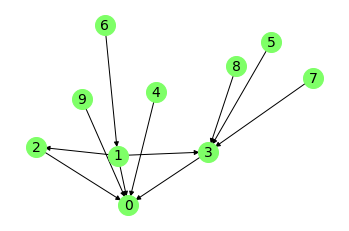

In [88]:
G = nx.gn_graph(10)
G.add_edges_from([(1, 2), (1, 3)])

draw_graph(G)

The algorithm for topo-sort is very easy to understand/implement. Here's the pseudocode:

```
function toposort(G):
    while there are nodes in G:
        Pick a random node in G with in-degree == 0
        if no nodes found:
            STOP --> the graph can't be topologically sorted
        else:
        remove the chosen node and all of 
            it's outgoing edges from the graph
            and append the node to the output.
```

__Notice that in order for toposort to work there can be no cycles in the graph, otherwise we would have a circular dependency and none of the nodes in the cycle will ever reach in-degree == 0.__

In [89]:
# else block is only executed if for loop
# finished normally, ie no breaks encountered
def toposort(G):
    G = G.copy()
    nodes_sort = []
    while G.nodes:
        for node in G:
            if G.in_degree(node) == 0:
                nodes_sort.append(node)
                G.remove_node(node)
                break
        else:
            raise Exception('There is no topological sort for this graph.')
    return nodes_sort

## Results

In [90]:
try:
    output = toposort(G)
except Exception as e:
    print(e)
else:
    for node in output[:-1]:
        print(f'{node} --> ', end='')
    print(output[-1])

4 --> 5 --> 6 --> 1 --> 2 --> 7 --> 8 --> 3 --> 9 --> 0
